In [1]:
!pip install -q opendatasets

import opendatasets as od
import pandas as pd

od.download('https://www.kaggle.com/datasets/unaissait/curated-chest-xray-image-dataset-for-covid19') # insert ypu kaggle  username and key

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: thutran4
Your Kaggle Key: ··········


100%|██████████| 3.49G/3.49G [00:42<00:00, 88.0MB/s]


In [3]:
from __future__ import print_function, division
from builtins import range, input

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import VGG16

from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

from glob import glob
import pandas as pd

In [4]:
dataset = '/content/curated-chest-xray-image-dataset-for-covid19/Curated X-Ray Dataset'

**Define few parameters**

In [5]:
#define size to which images are to be resized
IMAGE_SIZE = [224, 224] # feel free to change depending on dataset

# training config:
epochs = 500
batch_size = 32
lr=0.0001

#define paths
covid_path = '/content/curated-chest-xray-image-dataset-for-covid19/Curated X-Ray Dataset/COVID-19'
noncovid_path = '/content/curated-chest-xray-image-dataset-for-covid19/Curated X-Ray Dataset/Normal'


# Use glob to grab images from path .jpg or jpeg
covid_files = glob(covid_path + '/*')
noncovid_files = glob(noncovid_path + '/*')

**Fetch Images and Class Labels from Files**

In [6]:
# Preparing Labels
covid_labels = []
noncovid_labels = []

covid_images=[]
noncovid_images=[]

import cv2

for i in range(len(covid_files)):
    image = cv2.imread(covid_files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(224,224))
    covid_images.append(image)
    covid_labels.append('Chest_COVID')
for i in range(len(noncovid_files)):
    image = cv2.imread(noncovid_files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(224,224))
    noncovid_images.append(image)
    noncovid_labels.append('Chest_NonCOVID')

In [7]:
# Convert to array and Normalize to interval of [0,1]
covid_images = np.array(covid_images) / 255
noncovid_images = np.array(noncovid_images) / 255

**Visualize First 40 Images from Data set**

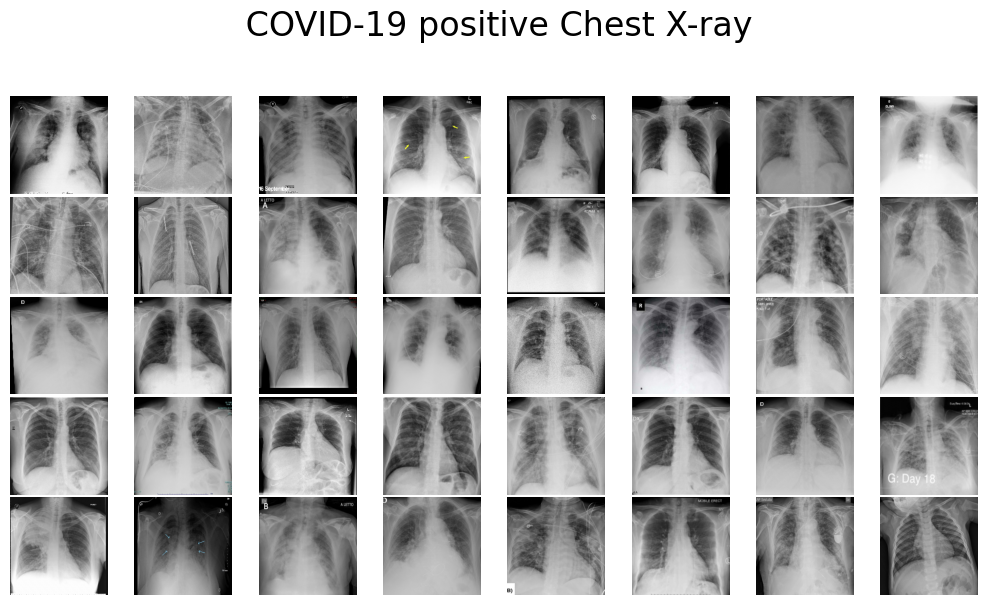

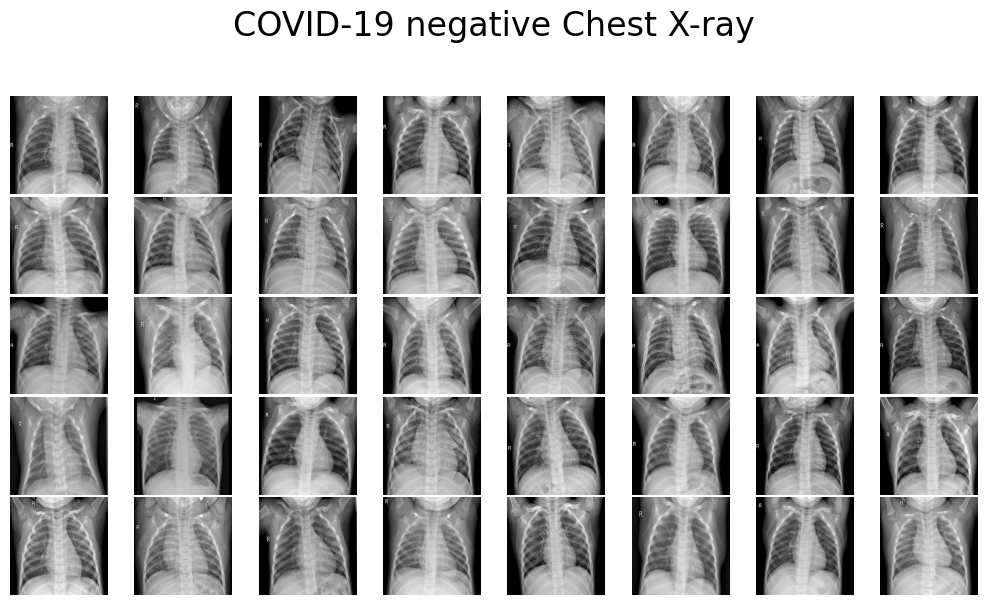

In [8]:
# look at a random image for fun
def plot_images(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()
plot_images(covid_images, ' COVID-19 positive Chest X-ray')
plot_images(noncovid_images, 'COVID-19 negative Chest X-ray')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

# split into 80% training and 20% testing
covid_x_train, covid_x_test, covid_y_train, covid_y_test = train_test_split(
    covid_images, covid_labels, test_size=0.2)
noncovid_x_train, noncovid_x_test, noncovid_y_train, noncovid_y_test = train_test_split(
    noncovid_images, noncovid_labels, test_size=0.2)

X_train = np.concatenate((noncovid_x_train, covid_x_train), axis=0)
X_test = np.concatenate((noncovid_x_test, covid_x_test), axis=0)

y_train = np.concatenate((noncovid_y_train, covid_y_train), axis=0)
y_test = np.concatenate((noncovid_y_test, covid_y_test), axis=0)

# make labels into categories - either 0 or 1
y_train = LabelBinarizer().fit_transform(y_train)
y_train = to_categorical(y_train)


y_test = LabelBinarizer().fit_transform(y_test)
y_test = to_categorical(y_test)

print("Train data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)

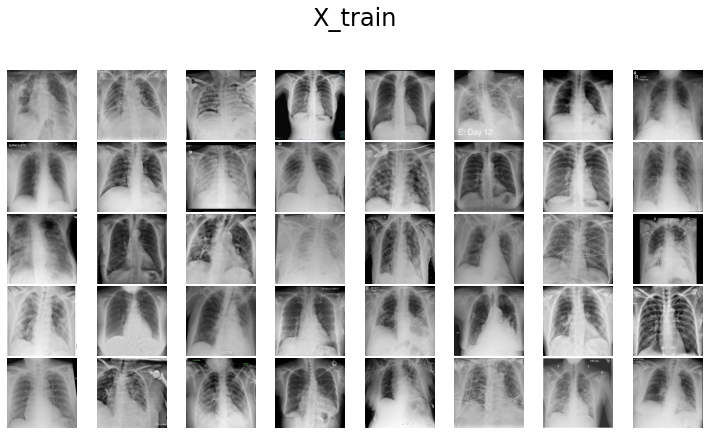

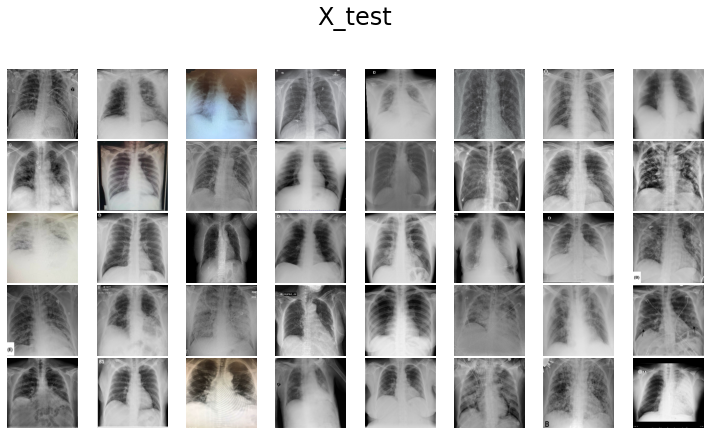

In [ ]:
plot_images(covid_x_train, 'X_train')
plot_images(covid_x_test, 'X_test')
# y_train and y_test contain class lables 0 and 1 representing COVID and NonCOVID for X_train and X_test

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
vggModel = VGG16(weights='/kaggle/input/vgg16-weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))
outputs = vggModel.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)

model = Model(inputs=vggModel.input, outputs=outputs)

for layer in vggModel.layers:
    layer.trainable = False

model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [ ]:
history = model.fit(train_aug.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / 32,
                    steps_per_epoch=len(X_train) / 32,
                    epochs=20)

Epoch 1/20
113/113 [==============================] - 1128s 10s/step - loss: 0.2361 - accuracy: 0.8952 - val_loss: 0.0537 - val_accuracy: 0.9813
Epoch 2/20
113/113 [==============================] - 1116s 10s/step - loss: 0.0733 - accuracy: 0.9724 - val_loss: 0.0471 - val_accuracy: 0.9824
Epoch 3/20
113/113 [==============================] - 1118s 10s/step - loss: 0.0601 - accuracy: 0.9820 - val_loss: 0.0497 - val_accuracy: 0.9868
Epoch 4/20
113/113 [==============================] - 1117s 10s/step - loss: 0.0349 - accuracy: 0.9889 - val_loss: 0.0513 - val_accuracy: 0.9846
Epoch 5/20
113/113 [==============================] - 1115s 10s/step - loss: 0.0746 - accuracy: 0.9748 - val_loss: 0.0663 - val_accuracy: 0.9748
Epoch 6/20
113/113 [==============================] - 1114s 10s/step - loss: 0.0444 - accuracy: 0.9863 - val_loss: 0.0539 - val_accuracy: 0.9868
Epoch 7/20
113/113 [==============================] - 1114s 10s/step - loss: 0.0355 - accuracy: 0.9849 - val_loss: 0.0591 - val_ac

In [ ]:
train_acc = history.history['accuracy']
train_loss=history.history['loss']
val_acc = history.history['val_accuracy']
val_loss=history.history['val_loss']

print("The highest train accuracy:",'%.4f' % max(train_acc))
print("The lowest train loss: "'%.4f' % min(train_loss))
print("The highest test accuracy: "'%.4f' % max(val_acc))
print("The lowest test loss: "'%.4f' % min(val_loss))

The highest train accuracy: 0.9898
The lowest train loss: 0.0312
The highest test accuracy: 0.9912
The lowest test loss: 0.0356


In [ ]:
model.save('vgg_chest.h5')

In [ ]:
model.save_weights('vggweights_chest.hdf5')

In [ ]:
model = load_model('vgg_chest.h5')

**Making Predictions (images from dataset)**

In [ ]:
y_pred = model.predict(X_test, batch_size=batch_size)

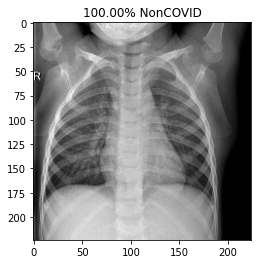

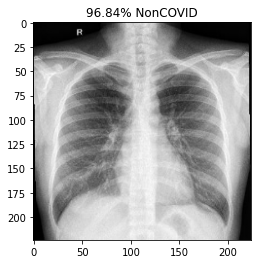

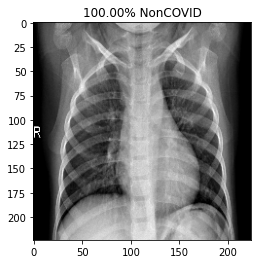

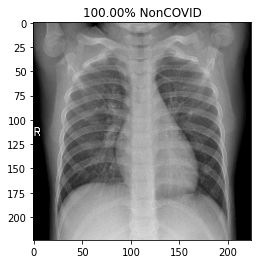

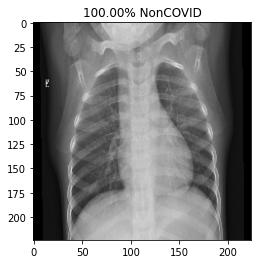

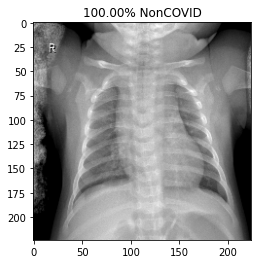

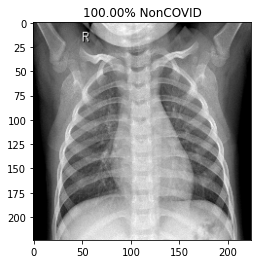

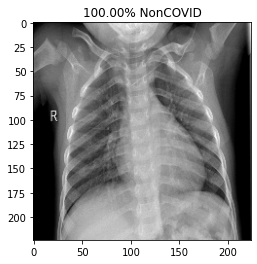

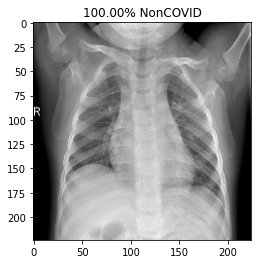

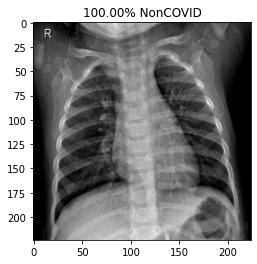

In [ ]:
prediction=y_pred[0:10]
for index, probability in enumerate(prediction):
    if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% NonCOVID')
    else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% COVID')
    plt.imshow(X_test[index])
    plt.show()

In [ ]:
# Convert to Binary classes
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

**Plot confusion matrix**

Confusion Matrix without Normalization


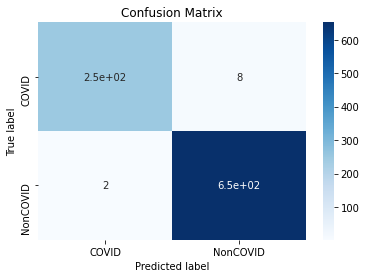

Confusion Matrix with Normalized Values


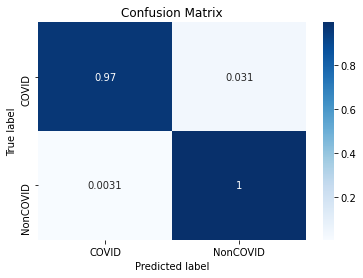

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(normalize):
    classes = ['COVID','NonCOVID']
    tick_marks = [0.5,1.5]
    cn = confusion_matrix(y_test_bin, y_pred_bin,normalize=normalize)
    sns.heatmap(cn,cmap=plt.cm.Blues,annot=True)
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       257
           1       0.99      1.00      0.99       654

    accuracy                           0.99       911
   macro avg       0.99      0.98      0.99       911
weighted avg       0.99      0.99      0.99       911



**Accuracy and Loss plot**

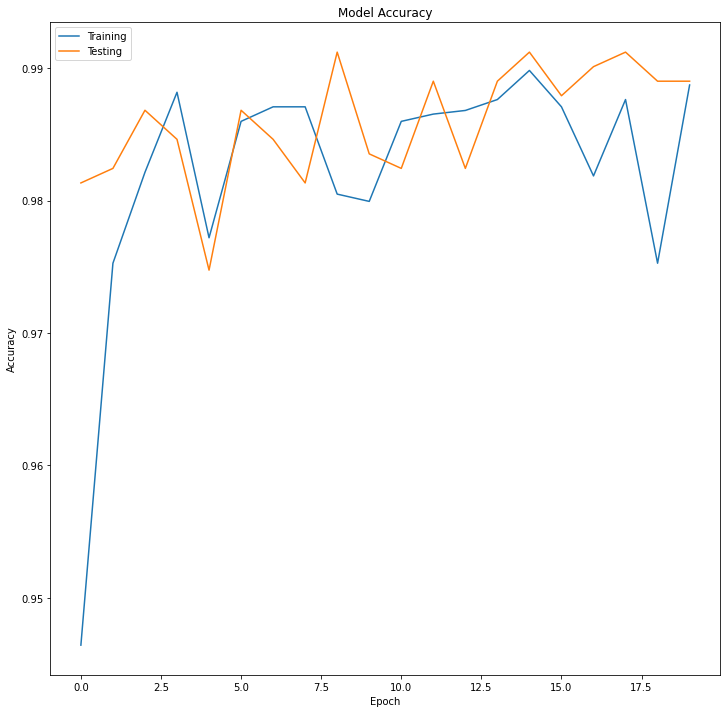

In [ ]:
plt.figure(figsize=(12,12))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'],loc='upper left')
plt.savefig('inception_chest_accuracy.png')
plt.show()

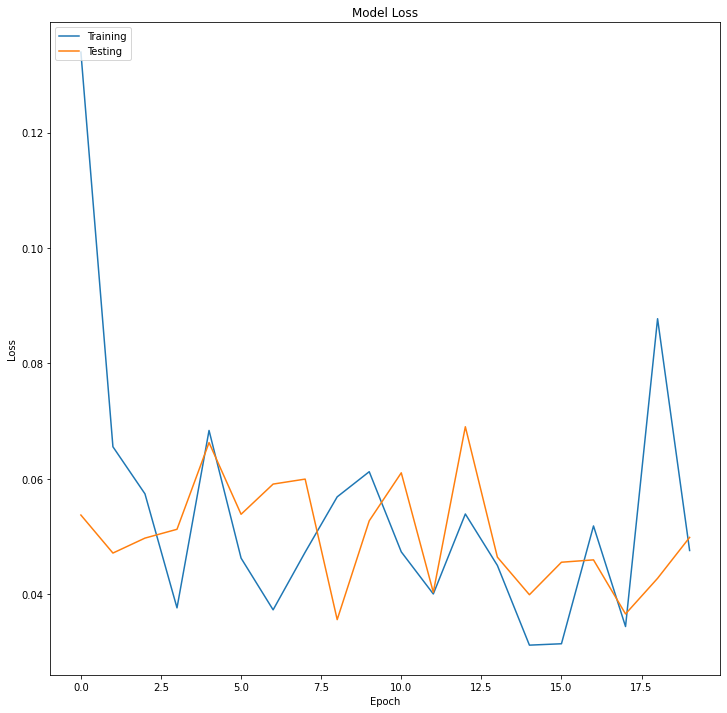

In [ ]:
plt.figure(figsize=(12,12))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'],loc='upper left')
plt.savefig('inception_chest_loss.png')
plt.show()

**Making prediction of 10 images in reality (outside dataset)**

In [ ]:
import cv2
dataset2 = '/kaggle/input/privatedts2'
predset_path = '/kaggle/input/privatedts2/predictset'
predset_files= glob(predset_path + '/*')
predset_images = []

for i in range(len(predset_files)):
    image = cv2.imread(predset_files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    predset_images.append(image)

predset_images = np.array(predset_images)/255

Probability: [1.5512999e-10 1.0000000e+00]
100.00% NonCOVID


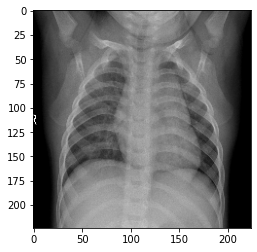

Probability: [0.96570456 0.03429545]
96.57% COVID


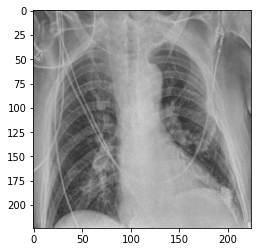

Probability: [9.9999619e-01 3.7624063e-06]
100.00% COVID


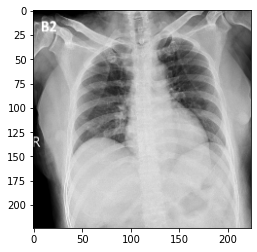

Probability: [2.3358705e-08 1.0000000e+00]
100.00% NonCOVID


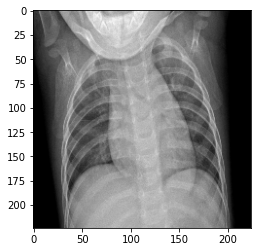

Probability: [9.9995160e-01 4.8361875e-05]
100.00% COVID


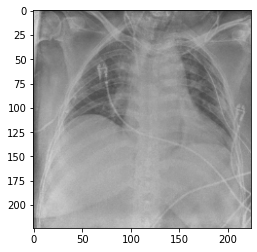

Probability: [6.888254e-14 1.000000e+00]
100.00% NonCOVID


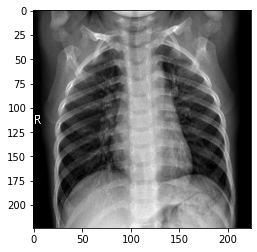

Probability: [0.9984723  0.00152769]
99.85% COVID


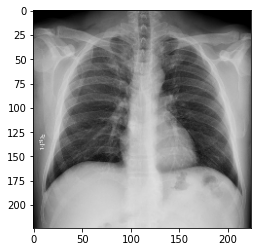

Probability: [6.1894665e-12 1.0000000e+00]
100.00% NonCOVID


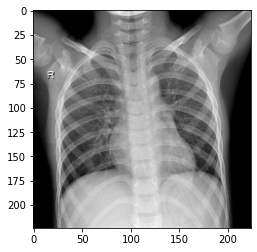

Probability: [1.5128971e-07 9.9999988e-01]
100.00% NonCOVID


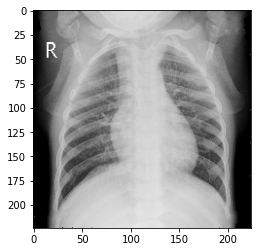

Probability: [9.9999404e-01 5.9921063e-06]
100.00% COVID


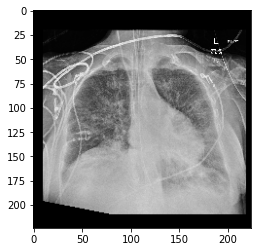

In [ ]:
model = load_model('/kaggle/input/mymodelvgg16/vgg_chest (1).h5')
y_pred2 = model.predict(predset_images, batch_size=32)

for index, probability in enumerate(y_pred2):
    print("Probability:", probability)
    if probability[1] > 0.5:
        print('%.2f' % (probability[1]*100) + '% NonCOVID')
    else:
        print('%.2f' % ((1-probability[1])*100) + '% COVID')

    plt.imshow(predset_images[index])
    plt.show()